<a href="https://colab.research.google.com/github/soot-bit/Tutorials/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Structure**


In linear regression, the target variable $y$ is assumed to follow a linear function of one or more predictor variables, $x_1,…,x_D$, plus some random error.

\begin{align}
    y_n &= \beta_0 + \beta_1 x_n + ... + \beta_D x_{nD} + \epsilon \\
    &= \mathbf{\beta}^T \mathbf{x_n} + \epsilon
\end{align}
at the $n^{th}$ observation

Now, to **generalise this to the full vector form** for all $ N $ observations, you simply stack the individual observations $ y_n $ into a vector $ \mathbf{y} $, and likewise the inputs $ \mathbf{x}_n $ into a design matrix $ \mathbf{X} $. Voala!, the **vectorised** model:

$$
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon} \tag{1}
$$

Where:
- $ \mathbf{y} \in \mathbb{R}^N $
- $ \mathbf{X} \in \mathbb{R}^{N \times D} $ (or $ N \times (D+1) $ if you include the bias term explicitly)
- $ \boldsymbol{\beta} \in \mathbb{R}^D $ (or $ D+1 $)
- $ \boldsymbol{\epsilon} \in \mathbb{R}^N $ is the vector of error terms



In [50]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng(97)

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelweight': 'bold',        # Bold axis labels
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',        # Bold title
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'xtick.direction': 'in',           #  ticks go inward
    'ytick.direction': 'in',
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'figure.figsize': (8, 6),
    'axes.grid': True
})


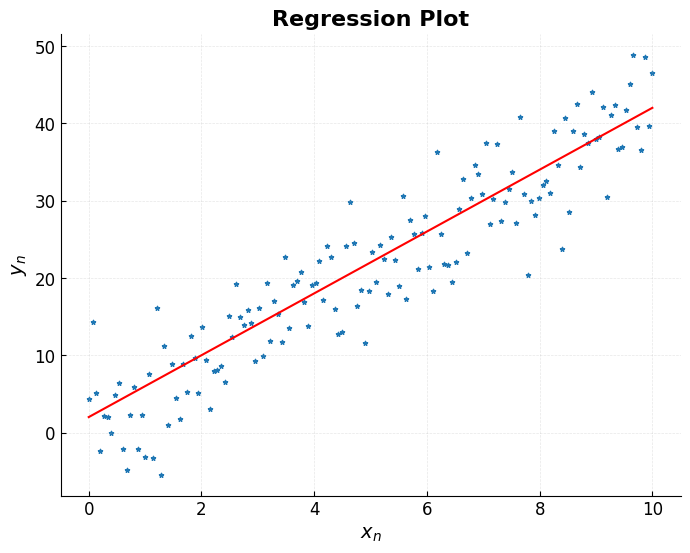

In [61]:


# true generating fuction y  = 4x - 2
n_samples = 150
beta_true = [-2, 4]

x = np.linspace(0, 10, n_samples)
def true_f(x):
    return beta_true[1]*x - beta_true[0]

y_obs = true_f(x) + rng.normal(loc=0, scale=5, size=x.shape)

def view():
    plt.scatter(x, y_obs, marker="*", s=10, label="observed")
    plt.plot(x, true_f(x), color="red", label="True")
    plt.title("Regression Plot")
    plt.xlabel(r"$x_n$")
    plt.ylabel(r"$y_n$")
view()

## **Parameter Estimation**

### 1. **Minimise Loss**

i.e, difference between what estimated parameter outputs ( *fitted* values ,"$y\_{pred}, \hat{y}$) from true $y_n$ (targets).  


\begin{align}
    \mathcal{L(\hat{\beta})} &= \frac{1}{N} \sum_{n = 1}^N ( y_n - \hat{y}_n )^2  \\
            &= \frac{1}{N} \sum_{i = 1}^N ( y_n - \mathbf{\hat{\beta}}^T \mathbf{x_n}  )^2 \\
            &= \frac{1}{N}   ( \mathbf{y} -  \mathbf{X}\mathbf{\hat{\beta}}  )^T(  \mathbf{y} - \mathbf{X}\mathbf{\hat{\beta}} )\\
            &= \frac{1}{N} \| \mathbf{y} - \mathbf{X} \hat{\boldsymbol{\beta}} \|^2 \tag{2}
\end{align}

and
\begin{align}
    \mathbf{y} \in \mathbb{R}^N, X \in \mathbb{R}^{N \times (D +1)}
\end{align}

$D + 1$ , plus intercept, $\beta_0$

choose  **parameter vector** $\hat{\boldsymbol{\beta}}$ that **minimises** the loss function.

---
**Exact solution**
For convenience, let’s drop the hat notation on $\hat{\boldsymbol{\beta}}$ , and redescribe:
$$
\mathcal{L}(\boldsymbol{\beta}) = \frac{1}{N} (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})
$$


We want to find:
$$
\hat{\boldsymbol{\beta}} = \arg \min_{\boldsymbol{\beta}} \mathcal{L}(\boldsymbol{\beta})
$$



$$
\mathcal{L}(\boldsymbol{\beta}) = \frac{1}{N} \left[ \mathbf{y}^T \mathbf{y} - 2 \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{y} + \boldsymbol{\beta}^T \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} \right]
$$

finding the min of the expression:

$$
\nabla_{\boldsymbol{\beta}} \mathcal{L} = \frac{1}{N} \left[ -2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} \right] = 0
$$

$$
-2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \boldsymbol{\beta} = 0
$$


$$
\boxed{
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
}\tag{3}
$$


### **Bayesian Framework for Linear Regression**

bayes
$$
P(\theta|y) = \frac{\overbrace{P(y|\theta)}^{\text{Likelihood}} \times \overbrace{P(\theta)}^{\text{Prior}}}{\underbrace{P(y)}_{\text{Evidence}}}
$$
- **Likelihood**: Quantifies how well the model explains the observed data.
- **Prior**: Encodes beliefs about parameters before seeing data.
- **Evidence**: Normalizing constant (often intractable, handled via MCMC/VI).


The **likelihood** is a statistical concept used to identify the most likely value of a parameter given the observed data. It reflects the explanatory power of a model and allows for relative comparisons between different parameter values between different parameter values. Ergo, **Maximising likelihood gives a method of estimating parameters.**


For the model:
$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(0, \sigma^2 \mathbf{I})
$$
The likelihood is derived from the noise distribution:
$$
P(\mathbf{y}|\boldsymbol{\beta}, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{N/2}} \exp\left(-\frac{1}{2\sigma^2} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 \right)
$$

- Gaussian kernel $\exp(-\text{SSE}/(2\sigma^2))$ penalizes large residuals.



#### **3. From Likelihood to MLE**
Negative log-likelihood (NNL) transformation:
$$
-\log P(\mathbf{y}|\boldsymbol{\beta}, \sigma^2) = \frac{N}{2}\log(2\pi\sigma^2) + \frac{1}{2\sigma^2}\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2
$$

**Monotonicity** of Log preserves optimization extrema. and logs are easier to deal with.


  $$
  \arg\max_{\boldsymbol{\beta}} P(\mathbf{y}|\boldsymbol{\beta}, \sigma^2) = \arg\min_{\boldsymbol{\beta}} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2
  $$
which will give same result



In [62]:
# X in N, D -> Npoints, 1
xx = np.stack((np.ones(x.shape[0]), x), axis = -1)
beta_mle = np.linalg.inv(xx.T @ xx) @ xx.T @ y_obs

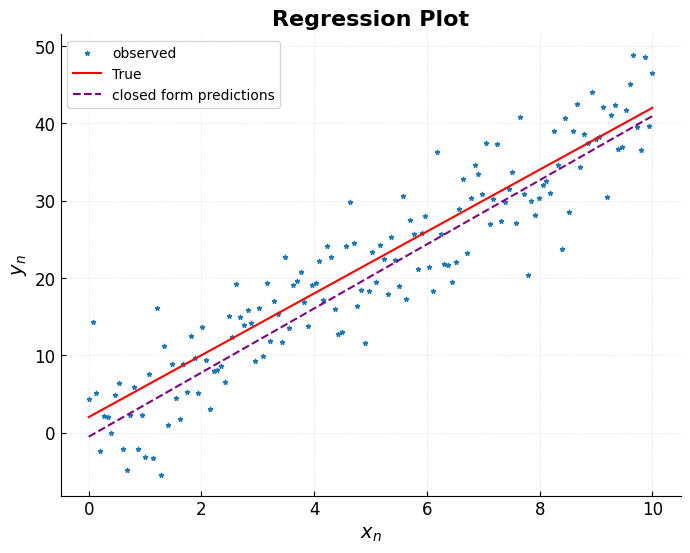

In [63]:
y_mle = beta_mle[1]*x - beta_mle[0]

view()
plt.plot(x, y_mle, linestyle="--", color="purple", label="closed form predictions")
plt.legend()
plt.show()


**observe:**
1. **Overfitting** , its fitting to the noise!
2. mass estimates (single $\hat{\boldsymbol{\beta}}$) lacks probabilistic interpretation.



### **Bayesian ++**:

**Priors** (encode assumptions):
Gaussian prior (ridge regularization)  
$$
  P(\boldsymbol{\beta}) = \mathcal{N}(\mathbf{0}, \tau^2 \mathbf{I})
$$
*Shrinks coefficients toward 0; $\tau^2$ controls strength.*


Combining likelihood and priors via Bayes’ theorem:
$$
P(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}) \propto P(\mathbf{y}|\boldsymbol{\beta}, \sigma^2) \cdot P(\boldsymbol{\beta})
$$

Log-Posterior

$$
\log P(\boldsymbol{\beta}, \sigma^2 | \mathbf{y}) = -\frac{1}{2\sigma^2} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 - \frac{1}{2\tau^2}\|\boldsymbol{\beta}\|^2
$$

**MAP**

$$
\hat{\boldsymbol{\beta}}_{\text{MAP}} = \arg\max_{\boldsymbol{\beta}} \log P(\boldsymbol{\beta}, \sigma^2 | \mathbf{y})
$$

$$
\hat{\boldsymbol{\beta}}_{\text{MAP}} = \arg\min_{\boldsymbol{\beta}} \left[ \frac{1}{2\sigma^2} \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2 + \frac{1}{2\tau^2} \|\boldsymbol{\beta}\|^2 \right]
$$


Differentiate w.r.t. $\boldsymbol{\beta}$ , set to zero:

$$
- \frac{1}{\sigma^2} \mathbf{X}^\top (\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) + \frac{1}{\tau^2} \boldsymbol{\beta} = 0
$$

Rearrange:

$$
\mathbf{X}^\top \mathbf{X} \boldsymbol{\beta} + \frac{\sigma^2}{\tau^2} \boldsymbol{\beta} = \mathbf{X}^\top \mathbf{y}
$$

$$
\left( \mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I} \right) \boldsymbol{\beta} = \mathbf{X}^\top \mathbf{y}
$$

$$
\hat{\boldsymbol{\beta}}_{\text{MAP}} = \left( \mathbf{X}^\top \mathbf{X} + \lambda \mathbf{I} \right)^{-1} \mathbf{X}^\top \mathbf{y}
\quad \text{where} \quad \lambda = \frac{\sigma^2}{\tau^2}
$$





**Key Takeaways**
1. **MLE ≡ OLS** under Gaussian noise, but both are prone to overfitting.
2. **Bayesian methods** provide:
   - Regularization through priors.
   - Full uncertainty quantification.
3. **Always check**: Posterior predictive distributions against real data.

In [80]:
lambda_ = 200
beta_map = np.linalg.solve(xx.T @ xx + lambda_ * np.identity(xx.shape[1]), xx.T @ y_obs)
y_map = beta_map[1]*x - beta_map[0]

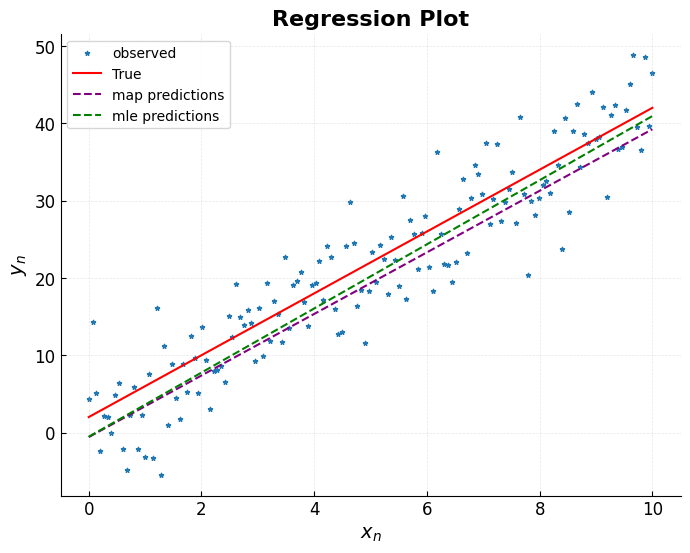

In [81]:
view()
plt.plot(x, y_map, linestyle="--", color="purple", label="map predictions")
plt.plot(x, y_mle, linestyle="--", color="green", label="mle predictions")
plt.legend()
plt.show()

**Bayesian vs. Frequentist Outputs**

| Approach       | Output                  | Pros                          | Cons                          |
|----|------|--------|--------|
| **MLE/OLS**    | Point estimate $\hat{\boldsymbol{\beta}}$ | Fast, simple           | No uncertainty, overfits      |
| **Bayesian**   | Posterior distribution  | Uncertainty-aware, regularized | Computationally intensive     |


